In [8]:
import os
import pandas as pd
import numpy as np
os.getcwd() #현재 경로 확인
os.chdir('C:\\Users\\SM\\Desktop\\YunJaeEun\\2023-2\\SWING')

In [61]:
일산화탄소_df = pd.read_csv("일산화탄소_월별_도시별_대기오염도_20230712184302.csv", engine="python", encoding='cp949')
이산화질소_df = pd.read_csv("이산화질소_월별_도시별_대기오염도_20230712184227.csv", engine="python", encoding='cp949')
PM25_df = pd.read_csv("미세먼지_PM2.5__월별_도시별_대기오염도_20230712183905.csv", engine="python", encoding='cp949')
PM10_df = pd.read_csv("미세먼지_PM10__월별_도시별_대기오염도_20230712184001.csv", engine="python", encoding='cp949')
아황산가스_df = pd.read_csv("아황산가스_월별_도시별_대기오염도_20230712184105.csv", engine="python", encoding='cp949')
오존_df = pd.read_csv("오존_월별_도시별_대기오염도_20230712184145.csv", engine="python", encoding='cp949')

In [62]:
PM25_df

,구분(1),구분(2),2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,서울특별시,서울특별시,25,30,30,21,22,20,19,22,...,32,19,20,19,15,13,7,13,26,23


In [63]:
PM25_df = PM25_df.drop(['구분(1)', '구분(2)'], axis=1)

new_df = pd.DataFrame([[0, 0, 0]],
                 columns = ['측정년도', '측정월', '초미세먼지'])

for i in range(84):
        year = PM25_df.columns[i][:4] #칼럼 앞부분의 4글자
        month = PM25_df.columns[i][5:] #칼럼의 뒷부분의 2글자
        if (month == '1'):
            month = '10'
        초미세먼지 = PM25_df.iloc[0, i] #일산화탄소
        
        #print(year, month, place, 초미세먼지, 미세먼지, 일산화탄소, 오존, 이산화질소, 아황산가스)
        new_df.loc[i] = [year, month, 초미세먼지]
new_df

,측정년도,측정월,초미세먼지
0,2015,01,25
1,2015,02,30
2,2015,03,30
3,2015,04,21
4,2015,05,22
...,...,...,...
79,2021,08,13
80,2021,09,7
81,2021,10,13
82,2021,11,26


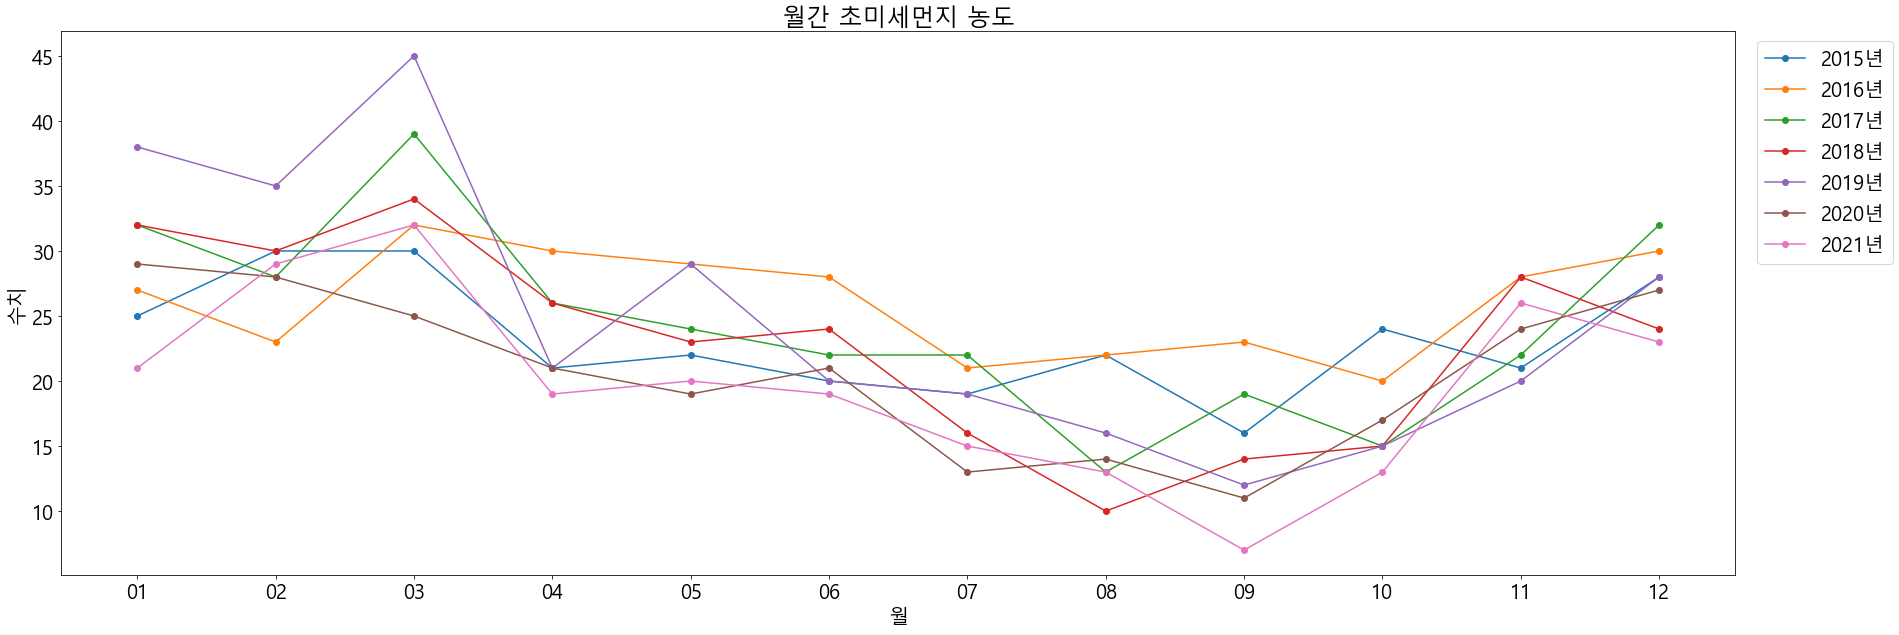

<Figure size 1440x720 with 0 Axes>

,측정년도,측정월,오존
0,2010,01,0.011
1,2010,02,0.016
2,2010,03,0.024
3,2010,04,0.026
4,2010,05,0.030
5,2010,06,0.033
6,2010,07,0.023
7,2010,08,0.018
8,2010,09,0.015
9,2010,10,0.014


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30, 10)

plt.title("월간 초미세먼지 농도")
plt.xlabel("월")
plt.ylabel("수치")


df_2015 = new_df.query('측정년도 == "2015"')
x2015 = df_2015['초미세먼지']
month = df_2015['측정월']

df_2016 = new_df.query('측정년도 == "2016"')
x2016 = df_2016['초미세먼지']

df_2017 = new_df.query('측정년도 == "2017"')
x2017 = df_2017['초미세먼지']

df_2018 = new_df.query('측정년도 == "2018"')
x2018 = df_2018['초미세먼지']

df_2019 = new_df.query('측정년도 == "2019"')
x2019 = df_2019['초미세먼지']

df_2020 = new_df.query('측정년도 == "2020"')
x2020 = df_2020['초미세먼지']

df_2021 = new_df.query('측정년도 == "2021"')
x2021 = df_2021['초미세먼지']

plt.plot(month, x2015, marker='o', label = '2015년')
plt.plot(month, x2016, marker='o', label = '2016년')
plt.plot(month, x2017, marker='o', label = '2017년')
plt.plot(month, x2018, marker='o', label = '2018년')
plt.plot(month, x2019, marker='o', label = '2019년')
plt.plot(month, x2020, marker='o', label = '2020년')
plt.plot(month, x2021, marker='o', label = '2021년')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
plt.figure(figsize=(20, 10))
plt.show()

df_2010